# **Video Game Sales Data Analysis - How have game sales changes over the years?**

# **About the dataset**
Dataset was created by a web scrape of [VGChartz](https://www.vgchartz.com/) and a web scrape of [Metacritic](https://www.metacritic.com/browse/games/release-date/available). 
#**Data Dictionary**
*   Name - Game title
*   Platform - Console on which the game is running
*   Year_of_Release - Year game was released
*   Genre - Game's category
*   Publisher - Party responsible for distributing the game
*   NA_Sales - Game sales in North America (in millions of units)
*   EU_Sales - Game sales in the European Union (in millions of units)
*   JP_Sales - Game sales in Japan (in millions of units)
*   Other_Sales - Game sales in the rest of the world, i.e. Africa, Asia excluding Japan, Australia, Europe excluding the E.U. and South America (in millions of units)
*   Global_Sales - Total sales in the world (in millions of units)
*   Critic_score - Aggregate score compiled by Metacritic staff
*   Critic_count - The number of critics used in coming up with the Criticscore
*   User_score - Score by Metacritic's subscribers
*   User_count - Number of users who gave the userscore
*   Developer - Party responsible for creating the game
*   Rating - The ESRB ratings
*   Console_Summary - Grouping platforms together by company$^{1}$



$^{1}$Not from original data source. Created mid-analysis. 


# **Data Source**
*   https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

#**Hypothesis**
*   The type of game sold will likely change over time with the addition of new genres over time.
* As the adoption of video game consoles increases, video game software consumption sales should follow a similar path
*   With more mainstream games, such as Zelda and Elder Scrolls, role playing games may grow in sales from 1990 to 2016











# **Prepping the Data**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#original dataset without changes 
link = 'https://raw.githubusercontent.com/alysse/Video-Game-Sales-Data-Analysis/main/Video_Games_Sales_as_at_22_Dec_2016.csv'
data_raw = pd.read_csv(link)
data_raw.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#Creating a copy of the raw dataset to be manipulated 
video_game_sales = data_raw.copy()

In [23]:
#Dropping null values and bad data (dataset shoud end in 2016)
video_game_sales = video_game_sales[video_game_sales.Year_of_Release != 2017]
video_game_sales = video_game_sales[video_game_sales.Year_of_Release != 2020]
video_game_sales.dropna(subset = ['Year_of_Release'], inplace=True)
#converting year to int to drop the trailing zero
video_game_sales.Year_of_Release = video_game_sales.Year_of_Release.astype(int)

In [24]:
#Finding unique values to use for dict below
video_game_sales['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [25]:
Platforms_dict = {
    'Nintendo': ['Wii','NES','GB', 'DS', 'GBA','SNES', '3DS', 'N64', 'WiiU','GC'],
    'Microsoft':['X360','XB','XOne'],
    'Playstation':['PS3', 'PS2', 'PS4','PS', 'PSP','PSV'],
    'PC':['PC'],
    'Other':['2600','GEN', 'DC',  'SAT', 'SCD', 'WS', 'NG', 'TG16','3DO', 'GG', 'PCFX']
    }

#creating list of keys from dict for for loop
x = [key[0] for key in Platforms_dict.items()]

#blank DF with column names for for loop
df3 = pd.DataFrame(columns=['Console_Summary', 'Platform'])

#for loop that creates a df from dict
for row in x[0:]:
    df2 = pd.DataFrame({'Console_Summary': row, 'Platform': Platforms_dict[row]})
    df3 = df3.append(df2)
    #print df3 #test to see if dataframe works

In [26]:
#Replace original dataset with merge of original dataset and for loop dataset (df3)
#This creates a new column based on the grouping  in the dictionary 
video_game_sales = pd.merge(video_game_sales, df3, on=['Platform'])

In [27]:
#Check to make sure the creation of the new column
video_game_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Console_Summary
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,Nintendo
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,Nintendo
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,Nintendo
3,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,Nintendo
4,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E,Nintendo


In [28]:
#Looking for null values in Console_Summary column 
video_game_sales['Console_Summary'].isna().any()

False

# **Data Exploration**

In [29]:
print(f"There are {len(video_game_sales['Name'].unique())} unique games, {len(video_game_sales['Platform'].unique())} unique consoles, {len(video_game_sales['Genre'].unique())} unique genres and {len(video_game_sales['Publisher'].unique())} unique publishers in this dataset")
print(f"There are {video_game_sales.shape[0]} rows and {video_game_sales.shape[1]} columns in this dataset")

There are 11427 unique games, 31 unique consoles, 13 unique genres and 580 unique publishers in this dataset
There are 16446 rows and 17 columns in this dataset


**Count of games sold for each console**

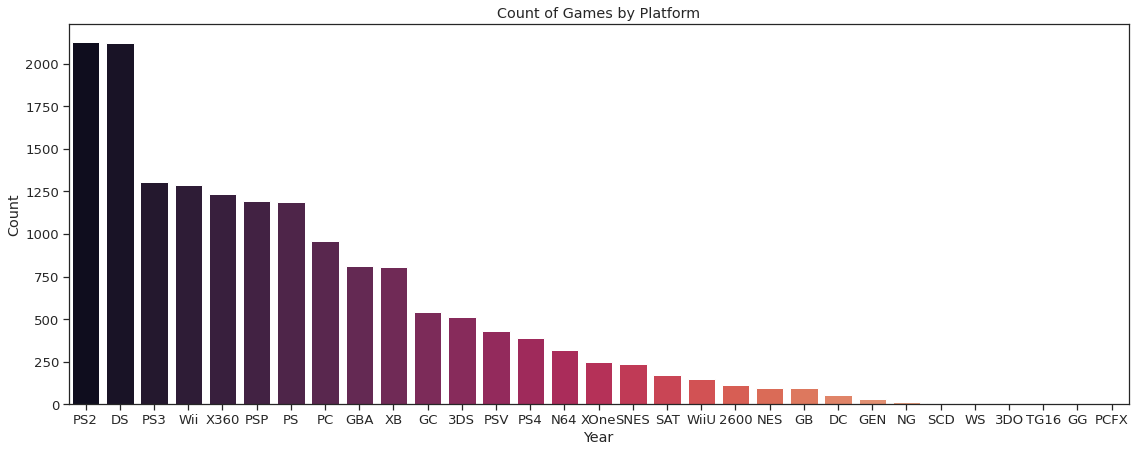

In [30]:
# plot sizing 
sns.set( style='ticks',font_scale=1.2, rc={'lines.linewidth': 2.00, 'figure.figsize': (19, 7)})
# about platforms
sns.countplot(x= 'Platform' , data = video_game_sales, palette = 'rocket',order = video_game_sales['Platform'].value_counts().index)

plt.title("Count of Games by Platform")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

**Changes in genre popularity over time**

Text(0, 0.5, 'Millions Units')

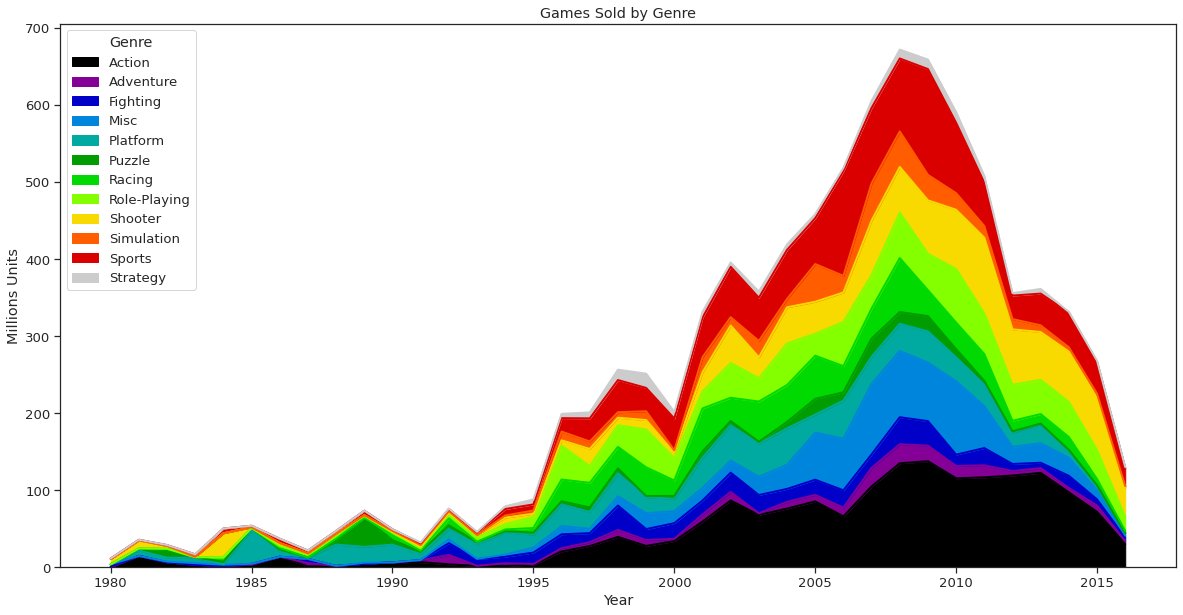

In [31]:
pivot = video_game_sales.pivot_table(index='Year_of_Release', columns='Genre', values='Global_Sales',aggfunc = "sum")
pivot.plot.area(figsize = (20,10),stacked=True, colormap='nipy_spectral')
plt.title("Games Sold by Genre")
plt.xlabel("Year")
plt.ylabel("Millions Units")

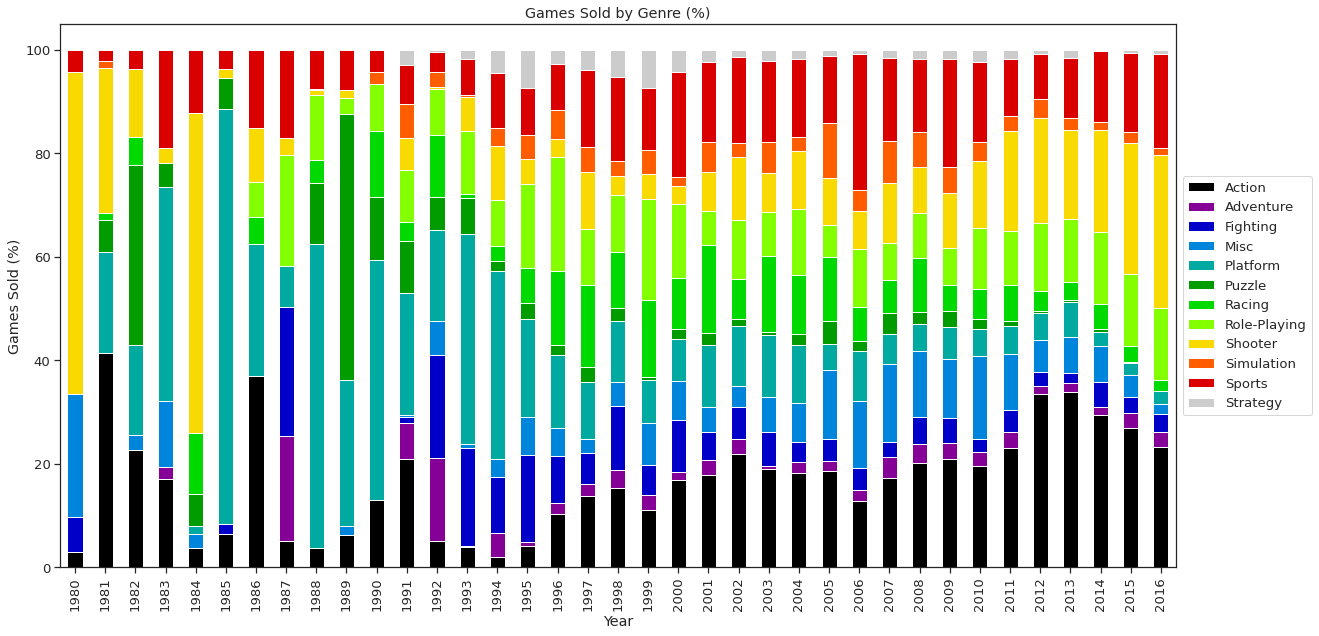

In [45]:
pivot_stacked = video_game_sales.pivot_table(index='Year_of_Release', columns='Genre', values='Global_Sales',aggfunc = "sum")

pivot_stacked.fillna(0, inplace= True)
stacked_data = pivot_stacked.apply(lambda x: x*100/sum(x), axis=1).plot(figsize = (20,10), kind="bar", stacked=True, colormap='nipy_spectral')
plt.title("Games Sold by Genre (%)")
plt.xlabel("Year")
plt.ylabel("Games Sold (%)")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

**Global Sales Over Time vs. User and Critic Scores**

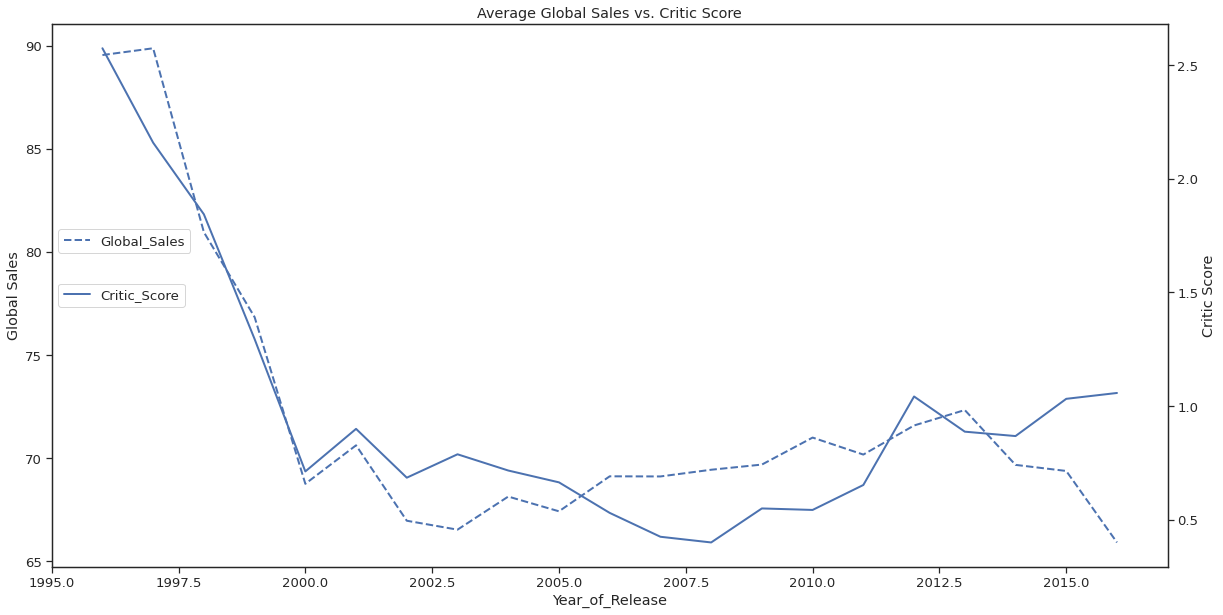

In [33]:
#Creating data set of average critic scores by year
Critic_Score_mean = video_game_sales[video_game_sales['Year_of_Release'] > 1995]  
Critic_Score_mean = Critic_Score_mean.groupby(['Year_of_Release'], as_index=False)['Critic_Score'].mean()

#Creating data set of average global sales by year
Games_Score_mean =video_game_sales.dropna(subset = ['Critic_Score']).copy()
Games_Score_mean = Games_Score_mean[Games_Score_mean['Year_of_Release'] > 1995]  
Games_Score_mean = Games_Score_mean.groupby(['Year_of_Release'], as_index=False)['Global_Sales'].mean()

#setting up subplots
fig, ax = plt.subplots(figsize = (20,10))
ax2 = ax.twinx()

#Setting up plot and line type
Critic_Score_mean.plot(x="Year_of_Release", y=["Critic_Score"], ax=ax,ls="-")
ax.set_ylabel('Global Sales')
Games_Score_mean.plot(x="Year_of_Release", y=["Global_Sales"], ax=ax2, ls="--")
ax2.set_title('Average Global Sales vs. Critic Score')
ax2.set_ylabel('Critic Score')
ax2.set_xlabel('Millions of Units')

#anchoring legens so they don't overlap
ax.legend(loc='center left', bbox_to_anchor=(0, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(0, 0.6))
plt.show()

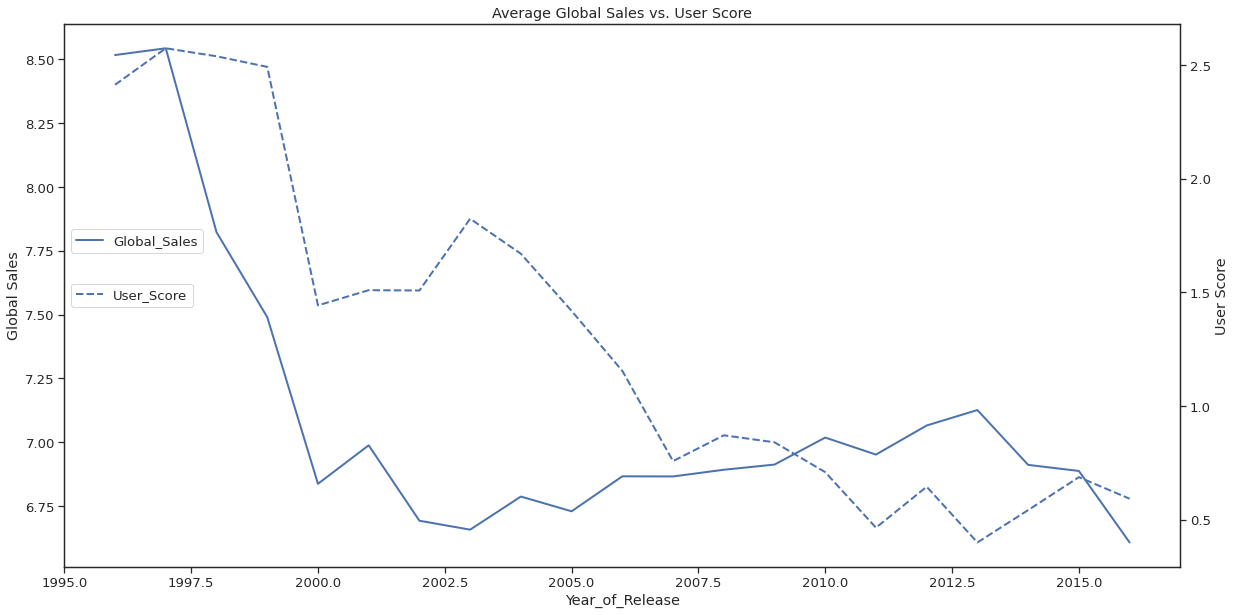

In [34]:
#Creating data set of average user scores by year
user_Score_mean =video_game_sales.dropna(subset = ['Critic_Score']).copy()
user_Score_mean = user_Score_mean[user_Score_mean['Year_of_Release'] > 1995]  
user_Score_mean.dropna(subset = ['User_Score'], inplace=True)
user_Score_mean = user_Score_mean[user_Score_mean.User_Score != 'tbd']
user_Score_mean['User_Score'] =pd.to_numeric(user_Score_mean['User_Score'])
user_Score_mean = user_Score_mean.groupby(['Year_of_Release'], as_index=False)['User_Score'].mean()

#setting up subplots
fig, ax = plt.subplots(figsize = (20,10))
ax2 = ax.twinx()

#Setting up plot and line type
Games_Score_mean.plot(x="Year_of_Release", y=["Global_Sales"], ax=ax2, ls="-")
ax.set_ylabel('Global Sales')
user_Score_mean.plot(x="Year_of_Release", y=["User_Score"], ax=ax, ls="--")
ax2.set_title('Average Global Sales vs. User Score')
ax2.set_ylabel('User Score')
ax2.set_xlabel('Millions of Units')

#anchoring legens so they don't overlap
ax.legend(loc='center left', bbox_to_anchor=(0, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(0, 0.6))

plt.show()

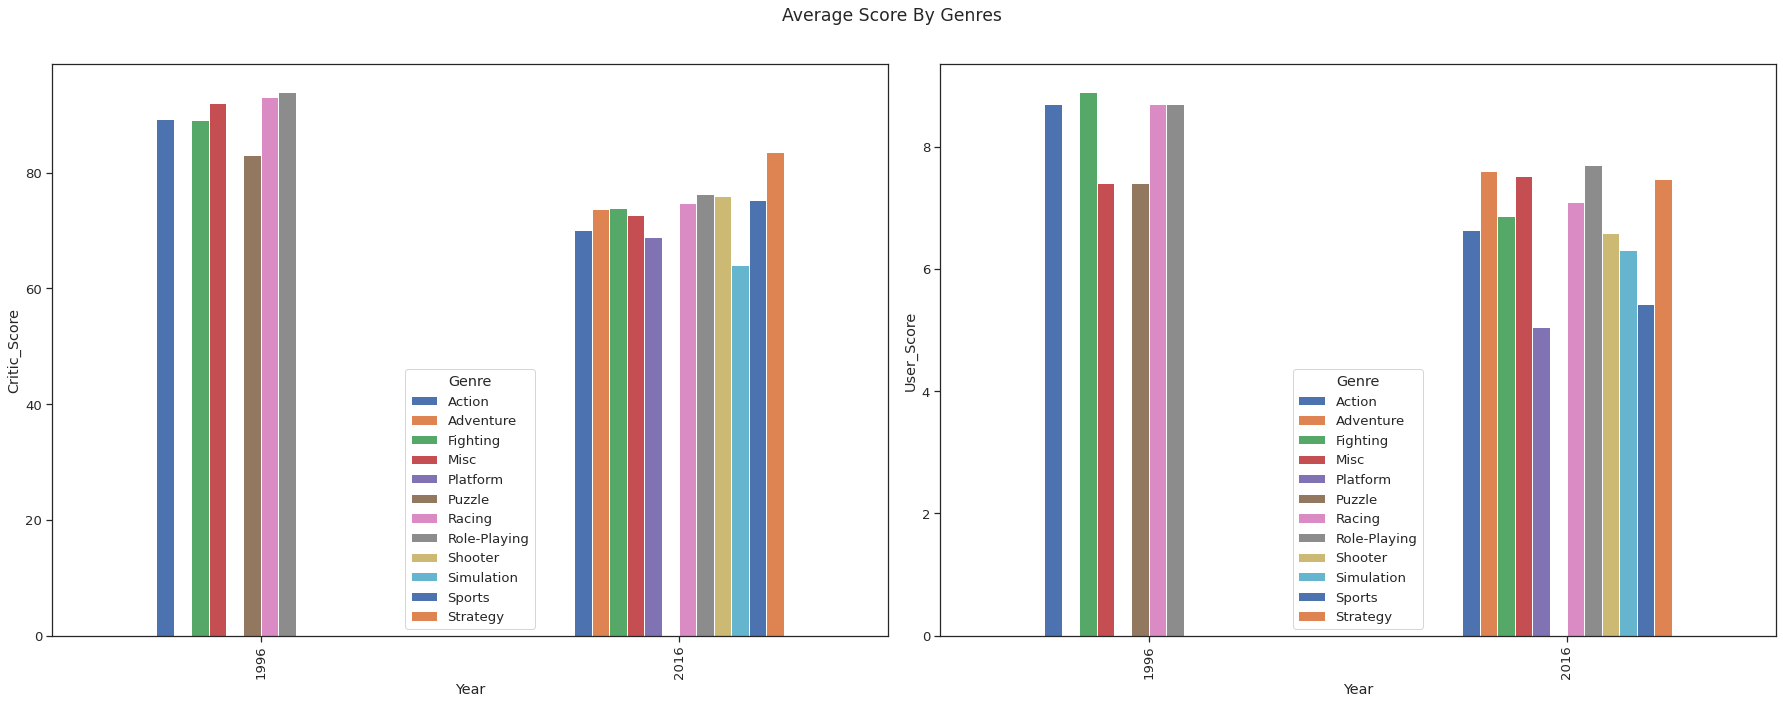

In [35]:
criticpivot =video_game_sales.copy()
criticpivot.dropna(subset = ['Critic_Score'], inplace=True)
criticpivot = criticpivot[criticpivot['Year_of_Release'].isin([1996,2016])]

criticpivot = criticpivot.pivot_table(index='Year_of_Release', columns='Genre', values='Critic_Score',aggfunc = "mean")

userpivot =video_game_sales.copy()
userpivot.dropna(subset = ['User_Score'], inplace=True)
userpivot = userpivot[userpivot.User_Score != 'tbd']
userpivot['User_Score'] =pd.to_numeric(userpivot['User_Score'])
userpivot = userpivot[userpivot['Year_of_Release'].isin([1996,2016])]

userpivot = userpivot.pivot_table(index='Year_of_Release', columns='Genre', values='User_Score',aggfunc = "mean")


fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(25,10))

criticpivot.plot.bar(ax=axes[0])

axes[0].set_ylabel('Critic_Score')
axes[0].set_xlabel('Year')
fig.tight_layout()

userpivot.plot.bar(ax=axes[1])

axes[1].set_ylabel('User_Score')
axes[1].set_xlabel('Year')

#stops overlapping of titles 
fig.tight_layout()

#Setting super title
fig.suptitle('Average Score By Genres')
plt.subplots_adjust(top=0.9)
fig.show()


**Top 10 games and genres based on units sold?**

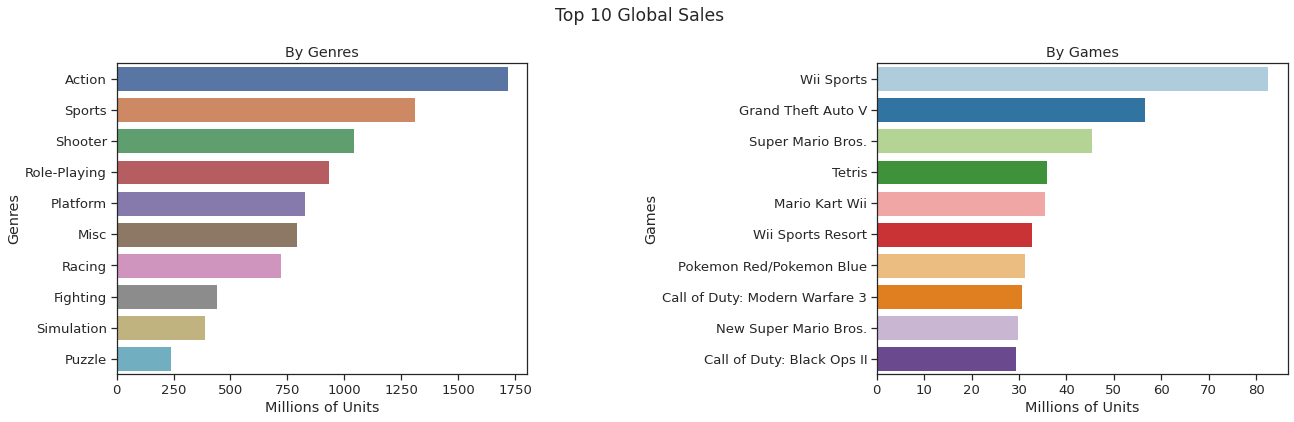

In [36]:
#Creating a dataframe of the top 10  genres
Top_10_Games_Genres = video_game_sales[['Genre', 'Global_Sales']].groupby(['Genre'],as_index=False) 
#w/o as_index = False genre becomes the index
#Some games were released more than once. This caluculation calculates based on all releases
Top_10_Games_Genres = Top_10_Games_Genres.sum().sort_values(by='Global_Sales', ascending=False).head(10)


#Creating a dataframe of the top 10 games
Top_10_Games = video_game_sales[['Name', 'Global_Sales']].groupby(['Name'],as_index=False) 
#w/o as_index = False Name becomes the index

Top_10_Games = Top_10_Games.sum().sort_values(by='Global_Sales', ascending=False).head(10)

#setting sns style for all plots
sns.set(context='notebook', style='ticks', font_scale=1.2, 
	rc={'lines.linewidth': 1.75, 'figure.figsize': (9, 6)})

#Creating two plots side by side
fig, ax =plt.subplots(1,2)
sns.barplot(x='Global_Sales',y ='Genre', data=Top_10_Games_Genres,ax=ax[0] )
ax[0].set_title('By Genres')
ax[0].set_ylabel('Genres')
ax[0].set_xlabel('Millions of Units')

sns.barplot(x='Global_Sales',y ='Name', data=Top_10_Games, ax=ax[1], palette='Paired' )
ax[1].set_title('By Games')
ax[1].set_ylabel('Games')
ax[1].set_xlabel('Millions of Units')
fig.tight_layout()

fig.suptitle('Top 10 Global Sales', x=1)
plt.subplots_adjust(top=0.85)
plt.subplots_adjust(wspace = .85)
plt.subplots_adjust(right = 2)

fig.show()


**What console sold the most based on company grouping?**

In [37]:
#loop to create a  dataset for each value in Console_Summary
z = 0
for c in x:
     vars()[c] = video_game_sales[video_game_sales['Console_Summary']==  x[z]]
     z = z + 1 
     
#pivoting dataset created above 
nintendopivot = Nintendo.pivot_table(index='Year_of_Release', columns='Platform', values='Global_Sales',aggfunc = "sum")
Otherpivot = Other.pivot_table(index='Year_of_Release', columns='Platform', values='Global_Sales',aggfunc = "sum")
PCpivot = PC.pivot_table(index='Year_of_Release', columns='Platform', values='Global_Sales',aggfunc = "sum")
Microsoftpivot = Microsoft.pivot_table(index='Year_of_Release', columns='Platform', values='Global_Sales',aggfunc = "sum")
Playstationpivot = Playstation.pivot_table(index='Year_of_Release', columns='Platform', values='Global_Sales',aggfunc = "sum")

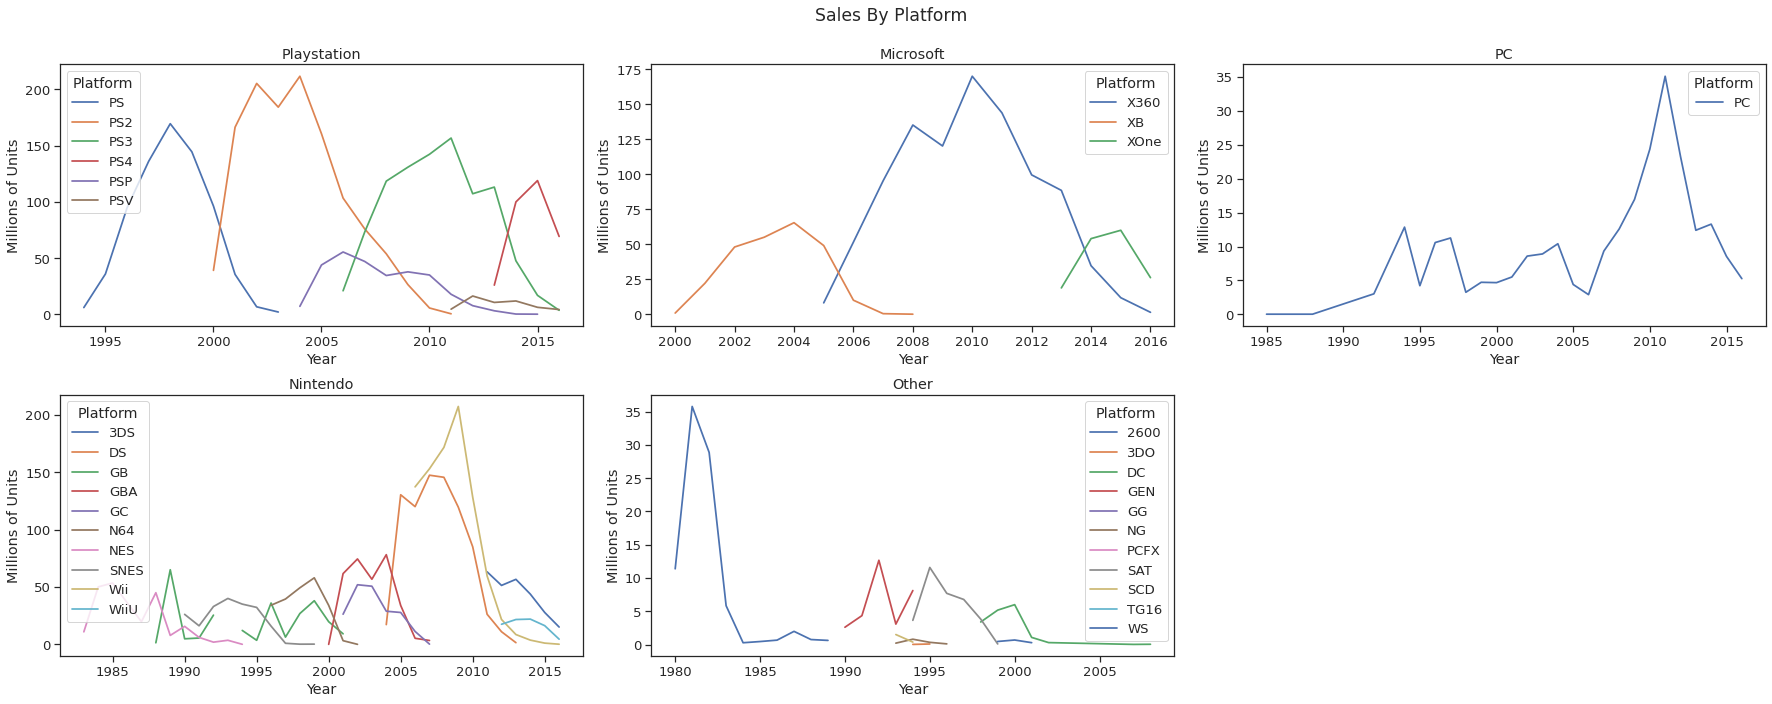

In [38]:
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(25,10))

Playstationpivot.plot(ax=axes[0,0])
axes[0,0].set_title('Playstation')
axes[0,0].set_ylabel('Millions of Units')
axes[0,0].set_xlabel('Year')

Microsoftpivot.plot(ax=axes[0,1])
axes[0,1].set_title('Microsoft')
axes[0,1].set_ylabel('Millions of Units')
axes[0,1].set_xlabel('Year')

PCpivot.plot(ax=axes[0,2])
axes[0,2].set_title('PC')
axes[0,2].set_ylabel('Millions of Units')
axes[0,2].set_xlabel('Year')

nintendopivot.plot(ax=axes[1,0])
axes[1,0].set_title('Nintendo')
axes[1,0].set_ylabel('Millions of Units')
axes[1,0].set_xlabel('Year')

Otherpivot.plot(ax=axes[1,1])
axes[1,1].set_title('Other')
axes[1,1].set_ylabel('Millions of Units')
axes[1,1].set_xlabel('Year')

#stops overlapping of titles 
fig.tight_layout()

#removes the last plot (it's blank)
fig.delaxes(axes[1][2])

#Setting super title
fig.suptitle('Sales By Platform')
plt.subplots_adjust(top=0.9)
fig.show()

# **Conclusion**
When reviewing “Count of Games by Platform”, we see that the PS2 and DS drove the most game releases. When reviewing industry news, this can be attributed to the high sales volume of the PS2 and the DS consoles. Likely due to the low price barrier and value propositions of both consoles, Sony and Nintendo were able to sell 153 and 155 million units, respectively. The more units sold, the greater the console's ability to sell software. Behind the PS2 and DS, we see the PS3 is the third highest ranking platform. The PS3 sold 87 million units, a far cry from the 150 million plus units of the DS and PS2.

The role-playing genre has reached mainstream status. The data in the “Games Sold by Genre” chart shows that role-playing game sales increased between 1990 and 2005. However, we see this general growth with all genres. In order to understand if the popularity was increasing, we created the “Games Sold by Genre (%)” graph. This bar graph by year allows us to examine the percentage share of role playing games year by year. Based on the results, we see that role-playing games did increase in popularity, going from 6.8% in 1986 to 13.9% in 2016.  Other notable genres that increased in popularity are sports games. The opposite can be said for puzzle games. Shooter games remain popular in 2016, however, they  do not own the majority share of the audience as they did in 1980.

Per the “Average Global Sales vs. Critic Score graph, we see that there is a link between average critic scores and global sales between the years of 1995 and 2001. This indicates that during that time period, critics had a very direct link in influencing people to purchase games. However, in the following years between 2002 and 2015, we see a change in this relationship. For example, in 2007, regardless of the critic score being low (average 66.2%), we still had global sales rising. On the contrary, 2015 shows that even though critic scores were rising (72.9%), sales in video games generally showed a decline. 

When comparing user scores to global sales, we see a very strong link between the two. Generally, as user scores decline, sales performance quickly follows. However, this relationship changed in 2004, as the two fell out of sync. This could potentially be attributed to the rise of “youtube gaming”, in which people watch others play video games. The “average score by genres” chart shows that average critic scores across all genres between 1996 and 2016. This could potentially be attributed to the increasing expectations of video game quality and video game complexity.

The “Top 10 Global Sales” depict the strongest genre and best performing video games. The genres analysis shows that Action, Sports and Shooters generally dominated the sales between 1990 and 2016. When reviewing individual games, we see Wii Sports was the most popular, at 82.5 million units sold. Followed by Grand Theft Auto (56.6 million) and then Super Mario Bros (45.3 Million). 

In last section we do see a general trend of positive growth in sales for Microsoft, Sony, and Nintendo and PC software. However, in the Microsoft, Sony and Nintendo charts, we do see major dips in software sales. 
Upon further review of industry news, Microsoft’s dip in sales can be attributed to the poor sales of the Xbox One in 2013. Industry experts point to Microsoft’s poor communication and branding of the Xbox One. Microsoft positioned the Xbox One as an all round TV centric media device. Moving the focus away from gaming hurt Microsoft's ability to sell units, which thus hurt game publishers ability to sell software. Sony, in a very similar situation, sees a major increase between the Playstation 1 and 2. The increasing success of the second playstation can be attributed to the inclusion of DVD playing capabilities in the 2nd playstation. With an increase in units sold, Sony saw a major leap in software sales, as we see in our data. However, we see a fall in software sales in the Playstation 3 category. Upon further review of industry news, the fall in software sales can be attributed to the low sales performance of Playstation 3 units, which can further be attributed to the high price stage Sony placed on the Playstation 3.
